In [ ]:
# No need to install in Colab – just import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving StudentsPerformance.csv to StudentsPerformance.csv


In [ ]:
import pandas as pd

# Replace with your actual filename if it's different
df = pd.read_csv('StudentsPerformance.csv')

# Display first 5 rows
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None

Missing values:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score       

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True


In [ ]:
# Calculate average score
df_encoded['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Define grade labels based on average score
def assign_grade(avg):
    if avg >= 90:
        return 'A'
    elif avg >= 80:
        return 'B'
    elif avg >= 70:
        return 'C'
    elif avg >= 60:
        return 'D'
    else:
        return 'F'

df_encoded['grade'] = df_encoded['average_score'].apply(assign_grade)
df_encoded.head()


,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,average_score,grade
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True,72.666667,C
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False,82.333333,B
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True,92.666667,A
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True,49.333333,F
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True,76.333333,C


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode grades (target variable)
le = LabelEncoder()
df_encoded['grade_encoded'] = le.fit_transform(df_encoded['grade'])

# Separate features and labels
X = df_encoded.drop(columns=['math score', 'reading score', 'writing score', 'average_score', 'grade', 'grade_encoded'])
y = df_encoded['grade_encoded']


In [ ]:
from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.295

Classification Report:
               precision    recall  f1-score   support

           0       0.12      0.09      0.11        11
           1       0.21      0.14      0.17        29
           2       0.25      0.27      0.26        52
           3       0.26      0.27      0.27        51
           4       0.40      0.46      0.43        57

    accuracy                           0.29       200
   macro avg       0.25      0.25      0.25       200
weighted avg       0.28      0.29      0.29       200


Confusion Matrix:
 [[ 1  1  4  4  1]
 [ 3  4 11  4  7]
 [ 1  6 14 18 13]
 [ 3  4 12 14 18]
 [ 0  4 14 13 26]]


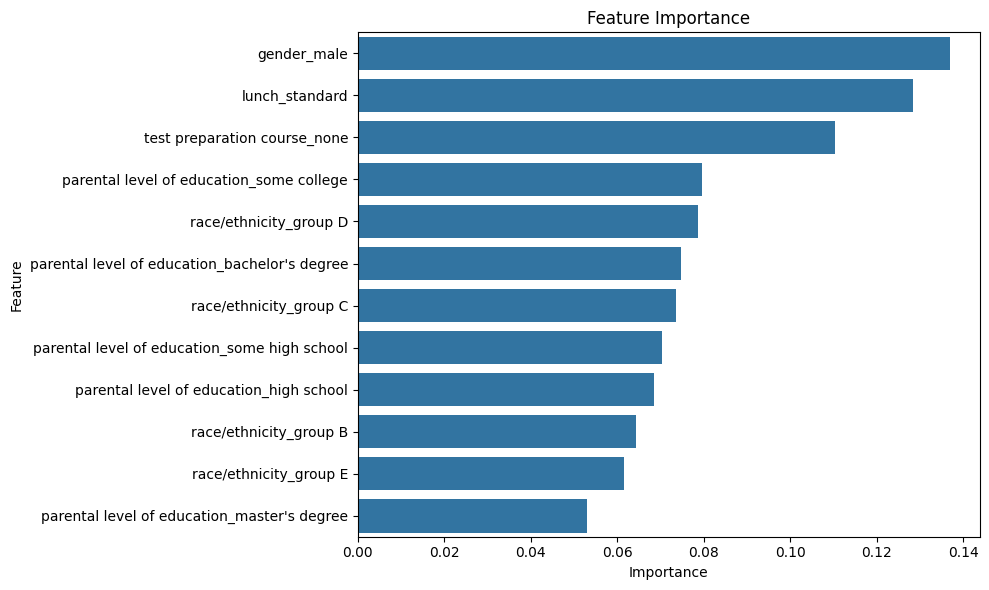

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = model.feature_importances_
features = X.columns

# Create DataFrame and sort
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
}


In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"----- {name} -----")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print()


----- Logistic Regression -----
Accuracy: 0.33
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.14      0.03      0.06        29
           2       0.31      0.44      0.37        52
           3       0.19      0.12      0.14        51
           4       0.42      0.63      0.50        57

    accuracy                           0.33       200
   macro avg       0.21      0.25      0.21       200
weighted avg       0.27      0.33      0.28       200


----- Support Vector Machine -----
Accuracy: 0.315
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        29
           2       0.25      0.35      0.29        52
           3       0.24      0.22      0.23        51
           4       0.44      0.60      0.51        57

    accuracy                          

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
!pip install xgboost
from xgboost import XGBClassifier

# Add XGBoost
models["XGBoost"] = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:55:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


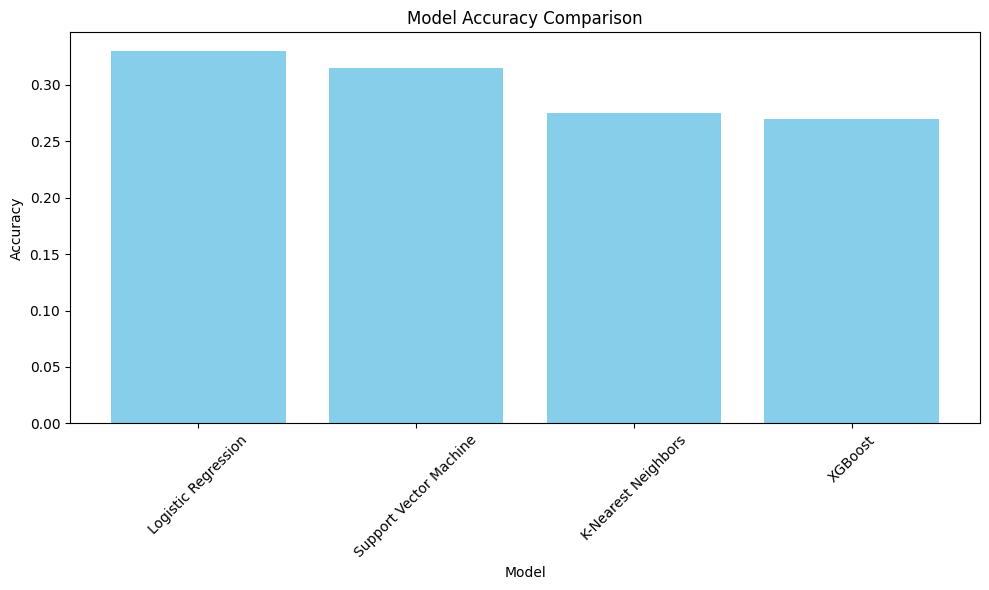

In [ ]:
import matplotlib.pyplot as plt

# Create a dictionary to store accuracy scores
accuracy_scores = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy

# Plotting the accuracy comparison
plt.figure(figsize=(10,6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize dictionaries to store metrics
precision_scores = {}
recall_scores = {}
f1_scores = {}

# Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate precision, recall, and f1-score
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    precision_scores[name] = precision
    recall_scores[name] = recall
    f1_scores[name] = f1

    # Print detailed classification report for each model
    print(f"----- {name} -----")
    print("Precision (Macro):", precision)
    print("Recall (Macro):", recall)
    print("F1-Score (Macro):", f1)
    print()


----- Logistic Regression -----
Precision (Macro): 0.21195452096614886
Recall (Macro): 0.24520329142406644
F1-Score (Macro): 0.21374194747688727

----- Support Vector Machine -----
Precision (Macro): 0.18545284376136073
Recall (Macro): 0.23166626974676507
F1-Score (Macro): 0.2044533620557009



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:55:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


----- K-Nearest Neighbors -----
Precision (Macro): 0.26392708057174435
Recall (Macro): 0.25134572022049334
F1-Score (Macro): 0.2538763575605681

----- XGBoost -----
Precision (Macro): 0.23152968628467718
Recall (Macro): 0.22413780660818133
F1-Score (Macro): 0.22524631650799876



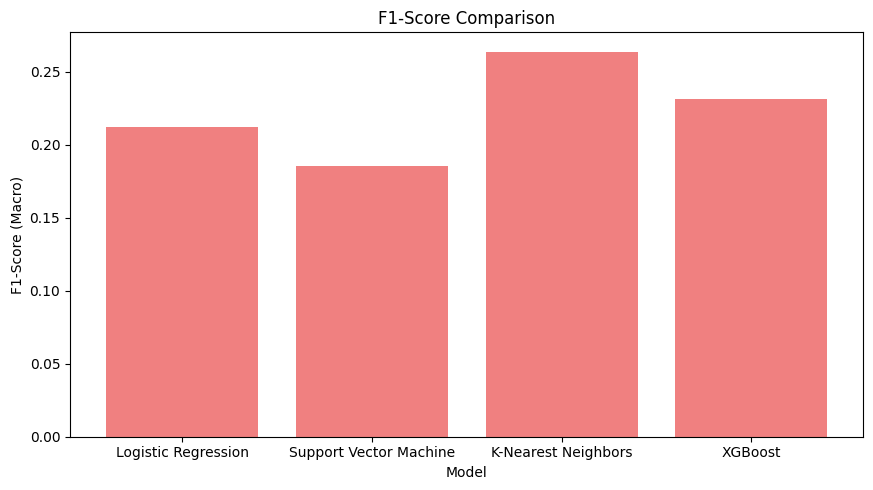

In [ ]:
# Plotting precision, recall, and F1-score for each model
metrics = ['F1-Score']
scores = [precision_scores, recall_scores, f1_scores]

plt.figure(figsize=(25, 5))

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    plt.bar(scores[i].keys(), scores[i].values(), color='lightcoral')
    plt.xlabel('Model')
    plt.ylabel(f'{metric} (Macro)')
    plt.title(f'{metric} Comparison')

plt.tight_layout()
plt.show()


In [ ]:
import streamlit as st
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Preload the model (you would normally save and load it here)
# Assuming the model is already trained in the notebook

# Dummy data and training steps (you'll replace this with your trained model)
data = {'studytime': [2, 3, 1], 'failures': [0, 1, 3], 'famrel': [4, 3, 2]}  # Example features
X = pd.DataFrame(data)

# Example model for illustration (replace with your trained model)
model = RandomForestClassifier()
model.fit(X, [0, 1, 2])  # Example grades

# Define the input fields
st.title("Student Grade Prediction")
studytime = st.slider('Study Time', 1, 4)
failures = st.slider('Failures', 0, 4)
famrel = st.slider('Family Relationship', 1, 5)

# Prepare input data
input_data = pd.DataFrame({'studytime': [studytime], 'failures': [failures], 'famrel': [famrel]})

# Prediction button
if st.button('Predict Grade'):
    prediction = model.predict(input_data)
    grade_mapping = {0: 'Fail', 1: 'Pass', 2: 'Good'}
    st.write(f"Predicted Grade: {grade_mapping[prediction[0]]}")


2025-05-16 05:55:48.340 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-16 05:55:48.341 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-16 05:55:48.344 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-16 05:55:48.345 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-16 05:55:48.346 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-16 05:55:48.349 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-16 05:55:48.350 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-16 05:55:48.351 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming your model is already trained. For example:
# Creating a simple dataset
data = {'studytime': [2, 3, 1], 'failures': [0, 1, 3], 'famrel': [4, 3, 2]}  # Example features
X = pd.DataFrame(data)

# Example model for illustration (replace with your actual trained model)
model = RandomForestClassifier()
model.fit(X, [0, 1, 2])  # Example grades

# Save the model to a file
joblib.dump(model, 'student_grade_model.pkl')


['student_grade_model.pkl']

In [ ]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load the trained model
model = joblib.load('student_grade_model.pkl')

# Function to get user input and predict grade
def predict_grade():
    # Take inputs from the user
    studytime = int(input("Enter study time (1-4): "))
    failures = int(input("Enter number of failures: "))
    famrel = int(input("Enter family relationship quality (1-5): "))

    # Prepare the input data for the model
    input_data = pd.DataFrame({'studytime': [studytime], 'failures': [failures], 'famrel': [famrel]})

    # Make prediction
    prediction = model.predict(input_data)

    # Map prediction to grade
    grade_mapping = {0: 'Fail', 1: 'Pass', 2: 'Good'}
    print(f"Predicted Grade: {grade_mapping[prediction[0]]}")

# Call the function to predict the grade
predict_grade()


Enter study time (1-4): 3
Enter number of failures: 0
Enter family relationship quality (1-5): 2
Predicted Grade: Pass


In [ ]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load the trained model
model = joblib.load('student_grade_model.pkl')

# Function to get user input and predict grade
def predict_grade():
    # Take inputs from the user
    studytime = int(input("Enter study time (1-4): "))
    failures = int(input("Enter number of failures: "))
    famrel = int(input("Enter family relationship quality (1-5): "))

    # Prepare the input data for the model
    input_data = pd.DataFrame({'studytime': [studytime], 'failures': [failures], 'famrel': [famrel]})

    # Make prediction
    prediction = model.predict(input_data)

    # Map prediction to grade
    grade_mapping = {0: 'pass', 1: 'fail', 2: 'Good'}
    print(f"Predicted Grade: {grade_mapping[prediction[0]]}")

# Call the function to predict the grade
predict_grade()


Enter study time (1-4): 2
Enter number of failures: 6
Enter family relationship quality (1-5): 3
Predicted Grade: fail
